Load Packages

In [111]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm


In [11]:
#Load data
df = pd.read_pickle("clean_training.pkl")

In [12]:
df

,Rider_id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Platform_type,is_business,Pickup_weekday,Pickup_time,Distance,Temperature,Travel_time
0,Rider_Id_432,1637,1309,13.8,549,3,True,5,37650,4,20.400000,745
1,Rider_Id_856,396,339,13.6,69,3,False,5,42249,16,26.400000,1993
2,Rider_Id_155,1023,242,12.5,114,3,True,2,46383,3,23.258889,455
3,Rider_Id_855,886,283,14.5,113,3,True,5,34986,9,19.200000,1341
4,Rider_Id_770,2311,872,14.1,533,1,False,1,36323,9,15.400000,1214
...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Rider_Id_953,1270,367,14.4,131,3,False,3,58808,3,28.600000,9
21197,Rider_Id_155,1023,242,12.5,114,3,True,6,38007,7,26.000000,770
21198,Rider_Id_697,314,473,13.8,29,3,True,4,64252,20,29.200000,2953
21199,Rider_Id_347,2451,1821,14.0,1101,1,False,3,35115,13,15.000000,1380


In [13]:
df.dtypes

Rider_id            object
No_Of_Orders         int64
Age                  int64
Average_Rating     float64
No_of_Ratings        int64
Platform_type     category
is_business           bool
Pickup_weekday    category
Pickup_time          int64
Distance             int64
Temperature        float64
Travel_time          int64
dtype: object

In [14]:
dummies = pd.get_dummies(df[["Platform_type", "Pickup_weekday"]])
dummies

,Platform_type_1,Platform_type_2,Platform_type_3,Platform_type_4,Pickup_weekday_1,Pickup_weekday_2,Pickup_weekday_3,Pickup_weekday_4,Pickup_weekday_5,Pickup_weekday_6,Pickup_weekday_7
0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21196,0,0,1,0,0,0,1,0,0,0,0
21197,0,0,1,0,0,0,0,0,0,1,0
21198,0,0,1,0,0,0,0,1,0,0,0
21199,1,0,0,0,0,0,1,0,0,0,0


In [15]:
df = pd.concat([df, dummies], axis=1)
df.drop(columns=["Platform_type", "Pickup_weekday"], inplace=True)

In [16]:
df.dtypes

Rider_id             object
No_Of_Orders          int64
Age                   int64
Average_Rating      float64
No_of_Ratings         int64
is_business            bool
Pickup_time           int64
Distance              int64
Temperature         float64
Travel_time           int64
Platform_type_1       uint8
Platform_type_2       uint8
Platform_type_3       uint8
Platform_type_4       uint8
Pickup_weekday_1      uint8
Pickup_weekday_2      uint8
Pickup_weekday_3      uint8
Pickup_weekday_4      uint8
Pickup_weekday_5      uint8
Pickup_weekday_6      uint8
Pickup_weekday_7      uint8
dtype: object

In [17]:
km_data = df.copy()
km_data

,Rider_id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,is_business,Pickup_time,Distance,Temperature,Travel_time,...,Platform_type_2,Platform_type_3,Platform_type_4,Pickup_weekday_1,Pickup_weekday_2,Pickup_weekday_3,Pickup_weekday_4,Pickup_weekday_5,Pickup_weekday_6,Pickup_weekday_7
0,Rider_Id_432,1637,1309,13.8,549,True,37650,4,20.400000,745,...,0,1,0,0,0,0,0,1,0,0
1,Rider_Id_856,396,339,13.6,69,False,42249,16,26.400000,1993,...,0,1,0,0,0,0,0,1,0,0
2,Rider_Id_155,1023,242,12.5,114,True,46383,3,23.258889,455,...,0,1,0,0,1,0,0,0,0,0
3,Rider_Id_855,886,283,14.5,113,True,34986,9,19.200000,1341,...,0,1,0,0,0,0,0,1,0,0
4,Rider_Id_770,2311,872,14.1,533,False,36323,9,15.400000,1214,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Rider_Id_953,1270,367,14.4,131,False,58808,3,28.600000,9,...,0,1,0,0,0,1,0,0,0,0
21197,Rider_Id_155,1023,242,12.5,114,True,38007,7,26.000000,770,...,0,1,0,0,0,0,0,0,1,0
21198,Rider_Id_697,314,473,13.8,29,True,64252,20,29.200000,2953,...,0,1,0,0,0,0,1,0,0,0
21199,Rider_Id_347,2451,1821,14.0,1101,False,35115,13,15.000000,1380,...,0,0,0,0,0,1,0,0,0,0


In [18]:
df.drop(columns=["Rider_id"], inplace=True)

In [19]:
features = df.columns
features = features.delete(features.get_loc("Travel_time"))
features

Index(['No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings', 'is_business',
       'Pickup_time', 'Distance', 'Temperature', 'Platform_type_1',
       'Platform_type_2', 'Platform_type_3', 'Platform_type_4',
       'Pickup_weekday_1', 'Pickup_weekday_2', 'Pickup_weekday_3',
       'Pickup_weekday_4', 'Pickup_weekday_5', 'Pickup_weekday_6',
       'Pickup_weekday_7'],
      dtype='object')

# Looking at coefficient

In [28]:
X = df[features]
y = df["Travel_time"]
y

0         745
1        1993
2         455
3        1341
4        1214
         ... 
21196       9
21197     770
21198    2953
21199    1380
21200    2128
Name: Travel_time, Length: 21201, dtype: int64

In [29]:
#
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
#Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=features)

model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

649760.5575386215

In [32]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.3551350735527419

<AxesSubplot: >

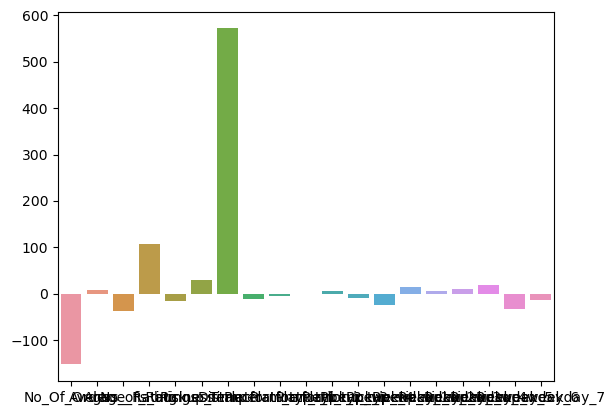

In [33]:
coefficients = np.squeeze(model.coef_)
sns.barplot(x=features, y=coefficients)

In [48]:
feature_ranking = pd.DataFrame(data=coefficients, index=X.columns)

In [51]:
feature_ranking[0] = abs(feature_ranking[0])

In [54]:
feature_ranking = feature_ranking.sort_values([0], ascending=False)

In [55]:
feature_ranking

,0
Distance,572.255707
No_Of_Orders,152.412057
No_of_Ratings,107.817655
Average_Rating,37.097240
Pickup_weekday_6,33.962828
Pickup_time,28.813075
Pickup_weekday_1,24.631451
Pickup_weekday_5,17.811632
is_business,15.899155
Pickup_weekday_2,14.342404


In [64]:
top10 = feature_ranking.index[0:10]
top10

Index(['Distance', 'No_Of_Orders', 'No_of_Ratings', 'Average_Rating',
       'Pickup_weekday_6', 'Pickup_time', 'Pickup_weekday_1',
       'Pickup_weekday_5', 'is_business', 'Pickup_weekday_2'],
      dtype='object')

In [34]:
X.head()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings,is_business,Pickup_time,Distance,Temperature,Platform_type_1,Platform_type_2,Platform_type_3,Platform_type_4,Pickup_weekday_1,Pickup_weekday_2,Pickup_weekday_3,Pickup_weekday_4,Pickup_weekday_5,Pickup_weekday_6,Pickup_weekday_7
0,1637,1309,13.8,549,True,37650,4,20.400000,0,0,1,0,0,0,0,0,1,0,0
1,396,339,13.6,69,False,42249,16,26.400000,0,0,1,0,0,0,0,0,1,0,0
2,1023,242,12.5,114,True,46383,3,23.258889,0,0,1,0,0,1,0,0,0,0,0
3,886,283,14.5,113,True,34986,9,19.200000,0,0,1,0,0,0,0,0,1,0,0
4,2311,872,14.1,533,False,36323,9,15.400000,1,0,0,0,1,0,0,0,0,0,0


# Linear model using 3 most weighted features

In [35]:
#Using smaller set of data
useful = ["No_Of_Orders", "Distance", "No_of_Ratings"]

In [36]:
X = df[features]
y= df["Travel_time"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X[useful], y, test_size=0.2, random_state=13)
#Standardizing

model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)

In [39]:
MSE

654583.8658904966

In [40]:
MAE

558.3107598177269

In [41]:
r2

0.3503481064931423

# Linear regression model using all data (not normalized)

In [43]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)

In [44]:
MSE

649760.5575386242

In [45]:
MAE

555.8217890878578

In [46]:
r2

0.3551350735527392

# Linear model with top 10 features

In [105]:
topx = feature_ranking.index[0:10]
topx

Index(['Distance', 'No_Of_Orders', 'No_of_Ratings', 'Average_Rating',
       'Pickup_weekday_6', 'Pickup_time', 'Pickup_weekday_1',
       'Pickup_weekday_5', 'is_business', 'Pickup_weekday_2'],
      dtype='object')

X_train, X_test, y_train, y_test = train_test_split(X[topx], y, test_size=0.2, random_state=13)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
aic = 

In [107]:
MSE

648095.8257167783

In [108]:
MAE

554.8573679618002

In [109]:
r2

0.3567872624266156

In [ ]:
#8
#9 554.9107
#10 554.8573679618002
#11
#12
#15 555.89

# PCA